In [1]:
import tweepy       # python wrapper for twitter api
import json
import time
import requests
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# step 0, get your own twitter credentials!

In [2]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = 'D6gWKTXWN7zo6FxYaCrDEoqK6'
api_secret = 'B0adaRE1E61AL9loEZiVF4nyjv4DmCGxrakBZSkoFbt7qJpjkw'
access_token = '41174820-IayjKYSiNgnwGMce0LustGQTCsdZaBcUbyiHbFA80'
access_secret = 'lP5UjMoh7fhxl23T5fWeasLy37ze9SyOU8IBjRT7oCNjY'

In [3]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

In [13]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# explain geocode is doing
bernie_tweets =  api.search(q="#berniesanders", count=100, geocode="37.781157,-122.398720,50mi") \
                + api.search(q='#bernie', count=100, geocode="37.781157,-122.398720,50mi") \
                + api.search(q='#FeelTheBern', count=100, geocode="37.781157,-122.398720,50mi")
hillary_tweets = api.search(q='#ImWithHer', count=100, geocode="37.781157,-122.398720,50mi") \
                + api.search(q='#hillaryclinton', count=100, geocode="37.781157,-122.398720,50mi") \
                + api.search(q='#hillary2016', count=100, geocode="37.781157,-122.398720,50mi")
the_donald_tweets = api.search(q='#donaldtrump', count=100, geocode="37.781157,-122.398720,50mi") \
                + api.search(q='#trump2016', count=100, geocode="37.781157,-122.398720,50mi") \
                + api.search(q='#trump', count=100, geocode="37.781157,-122.398720,50mi") \
                + api.search(q='#makeamericagreatagain', count=100, geocode="37.781157,-122.398720,50mi")

In [14]:
the_donald_tweets[0]

Status(contributors=None, truncated=False, text=u'Music to my ears Folks!\nWay to go! \n#Education\n#Latinos\n#HillaryClinton \n#Immigration \n#DonaldTrump \n#CNN #FoxNews https://t.co/cnb1hvVpcB', is_quote_status=True, in_reply_to_status_id=None, id=731559575564914688, favorite_count=1, _api=<tweepy.api.API object at 0x10bbaab10>, source=u'Twitter Web Client', quoted_status_id=731514172584792064, _json={u'contributors': None, u'truncated': False, u'text': u'Music to my ears Folks!\nWay to go! \n#Education\n#Latinos\n#HillaryClinton \n#Immigration \n#DonaldTrump \n#CNN #FoxNews https://t.co/cnb1hvVpcB', u'is_quote_status': True, u'in_reply_to_status_id': None, u'id': 731559575564914688, u'favorite_count': 1, u'entities': {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [36, 46], u'text': u'Education'}, {u'indices': [47, 55], u'text': u'Latinos'}, {u'indices': [56, 71], u'text': u'HillaryClinton'}, {u'indices': [73, 85], u'text': u'Immigration'}, {u'indices': [87, 99], 

In [16]:
# wrappers come with built in python attributes and methods!
print dir(the_donald_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [17]:
print the_donald_tweets[0].created_at
print the_donald_tweets[0].text
print the_donald_tweets[0].favorite_count
print the_donald_tweets[0].favorited
print the_donald_tweets[0].lang
print the_donald_tweets[0].geo
print the_donald_tweets[0].retweet_count
print the_donald_tweets[0].retweeted
print the_donald_tweets[0].possibly_sensitive
print the_donald_tweets[0].coordinates

2016-05-14 18:59:29
Music to my ears Folks!
Way to go! 
#Education
#Latinos
#HillaryClinton 
#Immigration 
#DonaldTrump 
#CNN #FoxNews https://t.co/cnb1hvVpcB
1
False
en
None
0
False
False
None


In [18]:
def parse_status_objects(tweet_list, main_candidate, main_party):
    modified_tweets = list()
    for x in tweet_list:
        modified_tweets.append( [
                    x.created_at,
                    x.text,
                    x.favorite_count,
                    x.favorited,
                    x.lang,
                    x.geo,
                    x.retweet_count,
                    x.retweeted,
                    x.coordinates,
                    main_candidate,
                    main_party
                ])
    return modified_tweets
        
hillary_tweets = parse_status_objects(hillary_tweets, 0, 1)
the_donald_tweets = parse_status_objects(the_donald_tweets, 2, 0)
bernie_tweets = parse_status_objects(bernie_tweets, 1, 1)

In [19]:
print bernie_tweets[0]
print the_donald_tweets[0]
print hillary_tweets[0]

[datetime.datetime(2016, 5, 14, 18, 29, 23), u'NYC CORRUPT #electionjusticeusa #berniesanders @ San Mateo CA 94401 https://t.co/efpkQkcypI', 0, False, u'en', None, 0, False, None, 1, 1]
[datetime.datetime(2016, 5, 14, 18, 59, 29), u'Music to my ears Folks!\nWay to go! \n#Education\n#Latinos\n#HillaryClinton \n#Immigration \n#DonaldTrump \n#CNN #FoxNews https://t.co/cnb1hvVpcB', 1, False, u'en', None, 0, False, None, 2, 0]
[datetime.datetime(2016, 5, 14, 19, 10, 12), u"That's why @BernieSanders is losing. His followers are rude, loud &amp; obnoxious.  This tactic isn't working #ImWithHer https://t.co/9u9fzOEW05", 0, False, u'en', None, 0, False, None, 0, 1]


In [20]:
type(hillary_tweets)

list

In [21]:
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count,favorited, language, geocode, rwtweet count, retweeted, coordinates, # candidate, party

tweets = pd.concat([pd.DataFrame(bernie_tweets), pd.DataFrame(hillary_tweets), pd.DataFrame(the_donald_tweets)])
tweets.columns = ['date', 'text', 'favorite_count','favorited', 'language', 'geocode', \
                      'retweet_count', 'retweeted', 'coordinates', 'main_candidate', 'main_party']



In [22]:
# 3 Create a function to take in a string and output the textblob sentiment of that string

#NLP
from textblob import TextBlob, Word
import sys

def stringToSentiment(text):
    try: 
        return TextBlob(text.decode('ascii', 'ignore')).sentiment.polarity
    except:
        pass
    try:
        return TextBlob(text.encode('ascii', 'ignore')).sentiment.polarity
    except:
        pass
    return 0

In [23]:
# 4 Add a column to your data frame called 'sentiment' which holds the sentiment of that tweet 
#(hint: use the function from #3)

tweets['sentiment'] = tweets.text.apply(stringToSentiment)

In [24]:
# 5 create a word count column, which holds the number of words in the text column
def wordCount(text):
    return len(TextBlob(text.encode('ascii', 'ignore')).words)

tweets['word_count'] = [wordCount(x) for x in tweets.text]

In [25]:
# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

countVect = CountVectorizer(stop_words='english')
doc_matrix = countVect.fit_transform(tweets.text)

# converting the document-matrix to a dataframe(term frquency count)
doc_matrix_df = pd.DataFrame(doc_matrix.toarray(), columns=countVect.get_feature_names())

# concatinating doc_matrix_df with allTweets
overall = pd.concat([tweets, doc_matrix_df], axis=1, join_axes=[tweets.index])


In [26]:
# 6 Use kmean to create clusters for the dataframe
from sklearn.cluster import KMeans
from sklearn import metrics

tweets_cluster = KMeans(n_clusters = 3, init = 'random')
Xc = overall.drop(['date', 'text', 'language','geocode','coordinates', 'sentiment'], axis=1)
tweets_cluster.fit(Xc) 

# save the clustering labels
overall['cluster'] = tweets_cluster.labels_

# cluster centroids
centers = tweets_cluster.cluster_centers_

# print the dataframe with cluster column
overall.sort_values(by='cluster').head(2)

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,main_candidate,...,zesty_lambo,zg,zgsdaqulrq,zika,znffmff0dd,zpum0flkkq,zvpprrysz4,zvsx2u3u7x,zzkadbzesi,cluster
0,2016-05-14 18:29:23,NYC CORRUPT #electionjusticeusa #berniesanders...,0,False,en,None,0,False,None,1,...,0,0,0,0,0,0,0,0,0,0
288,2016-05-12 02:42:35,RT @Melomelly2: The key to a successful phone ...,0,False,en,None,12,False,None,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#print mean values for each cluster
overall.groupby('cluster').mean()

,favorite_count,favorited,retweet_count,retweeted,main_candidate,main_party,sentiment,word_count,0b0botchgo,0bvedpij2w,...,zbegb208k1,zesty_lambo,zg,zgsdaqulrq,zika,znffmff0dd,zpum0flkkq,zvpprrysz4,zvsx2u3u7x,zzkadbzesi
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.466131,False,8.786452,False,1.009185,0.656716,0.067876,15.329506,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.003444,0.0,0.0,0.006889,0.001148
1,0.000000,False,200.020833,False,1.791667,0.208333,0.449870,21.229167,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,False,730.935484,False,1.935484,0.064516,0.405376,22.161290,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [ ]:
# 7 Explore the clusters
# What is interesting? Surprising? Can you draw any inferences about each cluster?
# Write your answer to these questions in markdown

#Exploring the clusters

# Cluster-1 : 
* This cluster seems to be the "most favorite tweets of election 2016"

In [28]:
# Cluster-1
overall.groupby('cluster').mean().iloc[0].sort_values(ascending = False).head(20)

word_count             15.3295
retweet_count          8.78645
main_candidate         1.00918
https                 0.944891
main_party            0.656716
rt                    0.632606
bernie                0.476464
favorite_count        0.466131
feelthebern           0.438576
berniesanders          0.43628
sanders               0.177956
caprimary             0.159587
bernie2016            0.144661
hillaryclinton        0.142365
itsnotradicaltosay    0.134328
dropouthillary         0.12744
supporters            0.114811
bayarea4bernie         0.10907
imwithher             0.105626
vote                  0.105626
Name: 0, dtype: object

# Cluster-2 : 
* This cluster seems to be "General tweets about all the candidates of election 2016"

In [29]:
# Cluster-2
overall.groupby('cluster').mean().iloc[1].sort_values(ascending = False).head(20)

retweet_count          200.021
word_count             21.2292
main_candidate         1.79167
https                 0.979167
rt                    0.729167
feelthebern             0.6875
sentiment              0.44987
caprimary             0.416667
bernie                0.291667
berniesanders         0.229167
bernieorbust          0.229167
itsnotradicaltosay    0.208333
main_party            0.208333
bayarea4bernie          0.1875
dropouthillary        0.166667
campaign              0.145833
donthecon             0.145833
orprimary             0.145833
aapiforbernie         0.145833
vote                  0.145833
Name: 1, dtype: object

# Cluster-3 : 
* This cluster seems to be "the most retweeted tweets of election 2016"

In [30]:
# Cluster-3
overall.groupby('cluster').mean().iloc[2].sort_values(ascending = False).head(20)

retweet_count          730.935
word_count             22.1613
main_candidate         1.93548
https                 0.935484
feelthebern           0.854839
rt                    0.806452
itsnotradicaltosay    0.467742
sentiment             0.405376
bayarea4bernie        0.403226
campaign              0.225806
dropouthillary        0.225806
big                   0.209677
security              0.209677
income                0.209677
corporate             0.209677
bgznq0mfy8            0.209677
run                   0.209677
anymore               0.209677
taxes                 0.209677
donations             0.209677
Name: 2, dtype: object

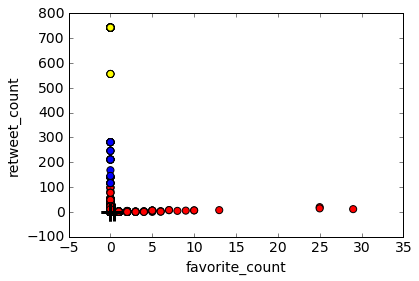

In [31]:
#plotting the cluseters:
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'blue', 'yellow'])

# scatter plot of fav_count versus retweets, colored by cluster (0=red, 1=blue, 2=yellow)
plt.scatter(overall.favorite_count, overall.retweet_count, c=colors[list(overall.cluster)], s=50)
plt.scatter(centers[:,0], centers[:,1], linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

In [ ]:
# 8 Create a column called 'democrat' and assign it to the corresponding candidate name for all the records
# 1 for bernie and hillary and 0 for donald trump
# NOT APPLICABLE SINCE IT IS DONE AT THE BEGINNING OF THIS EXCERCISE

In [39]:
# 9 Estimate classification models using knn and logistic regession.  Dont forget to use cross validation 
    # (do not use cross_val_score because we will want a confusion matrix).
# Use a three class response variable for knn.  For logistic regression predict democrat or republic?
#Assess the pros and cons of both approaches
#Extra Credit: Estimate multinomial regression model using the three class response variable

#knn
from sklearn.neighbors import KNeighborsClassifier

#logistic regression
from sklearn.linear_model import LogisticRegression

#Preping the dataset - Defining X and y
#knn
Xk = overall.drop(['date', 'text', 'language','geocode','coordinates', 'main_candidate'], axis=1)                      
yk = overall['main_candidate'] # Use a three class response variable for knn. 0 - Hillary, 1 - Bernie, 2 - Donald

#logistic regression
Xr = overall.drop(['date', 'text', 'language','geocode','coordinates', 'main_party'], axis=1)
yr = overall['main_party']  #For logistic regression predict democrat or republic? 0 - Republican, 1 - Democrat


In [40]:
yk.value_counts()

2    395
1    295
0    291
Name: main_candidate, dtype: int64

In [41]:
yr.value_counts()

1    586
0    395
Name: main_party, dtype: int64

In [42]:
# 10 Initialize a classification model (for both knn and logistic)
#knn
knn = KNeighborsClassifier(n_neighbors=3) 
print knn.fit(Xk,yk)

#logistic regression
logreg = LogisticRegression()   #(C=1e9)
print logreg.fit(Xr, yr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


In [43]:
# 11 Train your classification model  (for both knn and logistic)
#knn

from sklearn.cross_validation import train_test_split

Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk,yk)
print knn.fit(Xk_train,yk_train)

#logistic regression
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr,yr)
print logreg.fit(Xr_train,yr_train)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


In [44]:
# Check the accuracy score for training set
#knn 
print knn.score(Xk_train, yk_train)

#log reg




0.86122448979591837

In [56]:
# 12 Predict on your test features and targets (for both knn and logistic)
#knn
knn_predict = knn.predict(Xk_test)
unique, counts = np.unique(knn_predict, return_counts=True) #np.bincount(knn_predict)
print np.asarray((unique, counts)).T



[[ 0 76]
 [ 1 77]
 [ 2 93]]


In [61]:
#logreg
logreg_predict = logreg.predict(Xr_test)

unique, counts = np.unique(logreg_predict, return_counts=True) #np.bincount(knn_predict)
print np.asarray((unique, counts)).T


assorted_pred_prob = logreg.predict_proba(Xr_test)[:, 1]
#print assorted_pred_prob


[[  0  99]
 [  1 147]]


In [62]:
# 13 output your accuracy (for both knn and logistic)
# Null accuracy rate
#knn
null_accuracyrate = yk.value_counts()/yk.count()
print("The null accuracy rate for KNN model is:", null_accuracyrate)

#logistic regression
null_accuracyrate = yr.value_counts()/yr.count()
print("The null accuracy rate for logistic regression model is:", null_accuracyrate)



('The null accuracy rate for KNN model is:', 2    0.402650
1    0.300714
0    0.296636
Name: main_candidate, dtype: float64)
('The null accuracy rate for logistic regression model is:', 1    0.59735
0    0.40265
Name: main_party, dtype: float64)


In [63]:
# knn
knn.score(Xk_test, yk_test)

0.72357723577235777

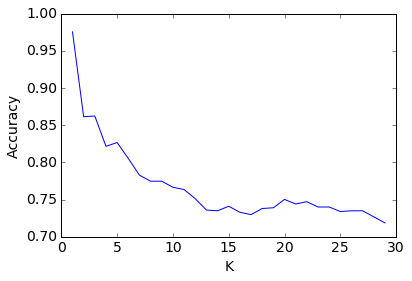

In [64]:
# plotting accuracy for knn:
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xk, yk)
    scores.append(knn.score(Xk_test, yk_test))
    

plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")


In [70]:
#assorted_pred_prob = logreg.predict_proba(yr_test)[:, 1]
# plot the predicted probabilities again
#plt.scatter(Xr_test, yr_test)
#plt.plot(Xr_test, assorted_pred_prob, color='red')   # THIS IS THROWING ERROR. NOT SURE HOW TO PLOT THE PROBABILITY GRAPH

In [72]:
#knn
print np.mean(knn_predict == yk_test)

#logreg
print np.mean(logreg_predict == yr_test)

0.723577235772
1.0


In [89]:
# 14 Create a confusion matrix for your predictions (for both knn and logistic)
from sklearn import metrics

#knn
knn_cm = metrics.confusion_matrix(yk_test, knn_predict)
print knn_cm



[[48 16 13]
 [11 59  9]
 [17  2 71]]


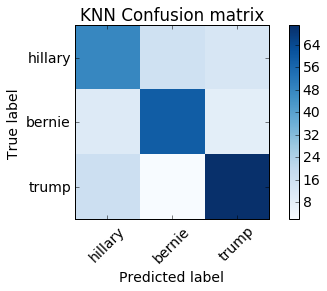

In [94]:
#knn confusion matrix

'''
From Documentation:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
'''
    
    
def plot_confusion_matrix(cm, yk_test, title='KNN Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(yk_test))
    plt.xticks(tick_marks, yk_test, rotation=45)
    plt.yticks(tick_marks, yk_test)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(knn_cm,['hillary','bernie','trump'])
plt.show()

In [92]:
#logistic regression
preds = logreg.predict(Xr_test)
logreg_cm = metrics.confusion_matrix(yr_test, preds)
print logreg_cm

#assorted_pred_prob = logreg.predict_proba(yr_test)[:, 1]
#print metrics.confusion_matrix(yr, assored_pred_prob)

[[ 99   0]
 [  0 147]]


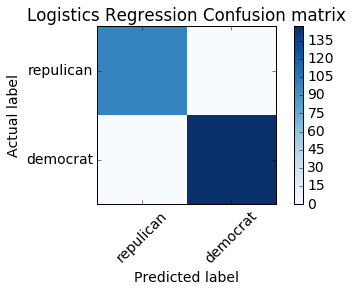

In [95]:
#logreg confusion matrix
def plot_confusion_matrix(cm, yr_test, title='Logistics Regression Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(yr_test))
    plt.xticks(tick_marks, yr_test, rotation=45)
    plt.yticks(tick_marks, yr_test)
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(logreg_cm,['repulican','democrat'])
plt.show()

In [ ]:
# 15 Who is the easiest candidate to predict? Why do you think? Who is the hardest? Why do you think?
# Write your answers in markdown (for both knn and logistic)

#KNN:

The model do a OKAY job in predicting candidate 1 and 2 (Bernie Sanders with 74.6% and Donald Trump with 78.8%). However, It does not predict candidate Hillary very well. % of Correct = 62.3%. This is because the tweets are talking to two candidates at the same time.
* Donald Trump is easiest to predict with 78.8% success rate. 
* Hillary Clinton is the most difficult to predict with 62.3% success rate. 

#Logistic Regression:

* The logistic regression model seems to do a perfect job in predicting party name. I am not sure about my model since it shows 100% success rate. May Be I am doing something wrong while training the model. Hopefully its not overfitting. 

In [ ]:
# 16 What are some extra features (data points) you would like to add to this data set. Explain in markdown.
# (hint maybe something like a boolean, "has_hashtag")

# Extra Features that might help the model:
* Derived data points by each hashtags. This might help segmenting the tweets in a better way to build the model.
    some tweets are purely campaign driven. Some tweets are purely hatred or satirical. 
* Removing tweets that does not make sense. There are so many random spam tweets which is creating noise in the model
* deriving user info: Age group, Sex might help in prediction.

In [ ]:
# 17 Try adding extra features to improve the quality of your predictions (for both knn and logistic)